In [1957]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [1958]:
columnNames = ["n_preg", "plasma_glu", "bld_press", "sk_fd_th", "serum_ins", 
                "bmi", "dia_ped_func", "age", "class"]
dataFrame = pd.read_csv("data/pima-indians-diabetes.csv", header=None, names=columnNames)
dataFrame.head(10)

,n_preg,plasma_glu,bld_press,sk_fd_th,serum_ins,bmi,dia_ped_func,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,1,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [1959]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_preg        768 non-null    int64  
 1   plasma_glu    768 non-null    int64  
 2   bld_press     768 non-null    int64  
 3   sk_fd_th      768 non-null    int64  
 4   serum_ins     768 non-null    int64  
 5   bmi           768 non-null    float64
 6   dia_ped_func  768 non-null    float64
 7   age           768 non-null    int64  
 8   class         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1960]:
containsNull = dataFrame.isnull().sum().any()
numOfDuplicates = dataFrame.duplicated().sum()

if containsNull:
    print("Các dòng null: ")
    display.display(dataFrame[dataFrame.isnull().any(axis=1)])
else: 
    print("Không có dòng null.")


if numOfDuplicates > 0:
    print("Số dòng trùng lặp: ", numOfDuplicates)
    print("Các dòng trùng lặp: ")
    display.display(dataFrame[dataFrame.duplicated()])
else:
    print("Không có dòng trùng lặp.")

Không có dòng null.
Không có dòng trùng lặp.


In [1961]:
dataFrame.describe()

,n_preg,plasma_glu,bld_press,sk_fd_th,serum_ins,bmi,dia_ped_func,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.201823,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.817369,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,1.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1962]:
zero_counts = (dataFrame == 0).sum()
print(zero_counts)

n_preg          111
plasma_glu        5
bld_press        35
sk_fd_th        227
serum_ins       374
bmi              11
dia_ped_func      0
age               0
class           500
dtype: int64


In [1963]:
replacedColumns = ["plasma_glu", "bld_press", "bmi", "sk_fd_th"]
dataFrame[replacedColumns] = dataFrame[replacedColumns].replace(0, np.nan)


In [1964]:
print("Zero counts: ")
zeroCounts = (dataFrame[replacedColumns] == 0).sum()
print(zeroCounts)
print("\nNull counts: ")
nullCounts = (dataFrame[replacedColumns]).isna().sum()
print(nullCounts)

Zero counts: 
plasma_glu    0
bld_press     0
bmi           0
sk_fd_th      0
dtype: int64

Null counts: 
plasma_glu      5
bld_press      35
bmi            11
sk_fd_th      227
dtype: int64


In [1965]:
for column in replacedColumns:
    dataFrame[column] = dataFrame[column].fillna(dataFrame[column].median())

nullCounts = (dataFrame[replacedColumns]).isna().sum()
print(nullCounts)

plasma_glu    0
bld_press     0
bmi           0
sk_fd_th      0
dtype: int64


In [1966]:
containsNull = dataFrame.isnull().sum().any()
numOfDuplicates = dataFrame.duplicated().sum()

if containsNull:
    print("Các dòng null: ")
    display.display(dataFrame[dataFrame.isnull().any(axis=1)])
else: 
    print("Không có dòng null.")


if numOfDuplicates > 0:
    print("Số dòng trùng lặp: ", numOfDuplicates)
    print("Các dòng trùng lặp: ")
    display.display(dataFrame[dataFrame.duplicated()])
else:
    print("Không có dòng trùng lặp.")

Không có dòng null.
Không có dòng trùng lặp.


In [1967]:
dataFrame.describe()

,n_preg,plasma_glu,bld_press,sk_fd_th,serum_ins,bmi,dia_ped_func,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,79.799479,32.455208,0.471876,33.201823,0.348958
std,3.369578,30.438286,12.096642,8.791221,115.244002,6.875177,0.331329,11.817369,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,1.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


class
0    500
1    268
Name: count, dtype: int64


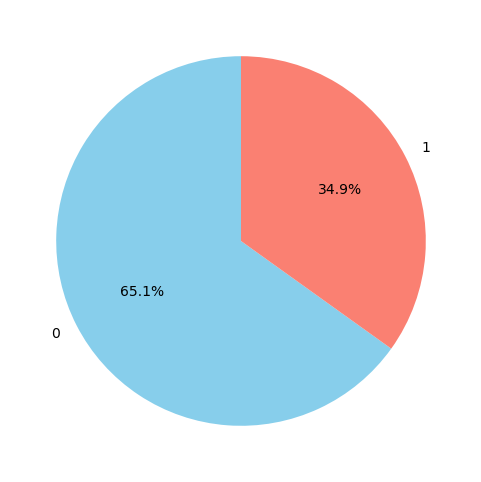

In [1968]:
counts = dataFrame["class"].value_counts()
print(counts)
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.show()

array([[<Axes: title={'center': 'n_preg'}>,
        <Axes: title={'center': 'plasma_glu'}>,
        <Axes: title={'center': 'bld_press'}>],
       [<Axes: title={'center': 'sk_fd_th'}>,
        <Axes: title={'center': 'serum_ins'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'dia_ped_func'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

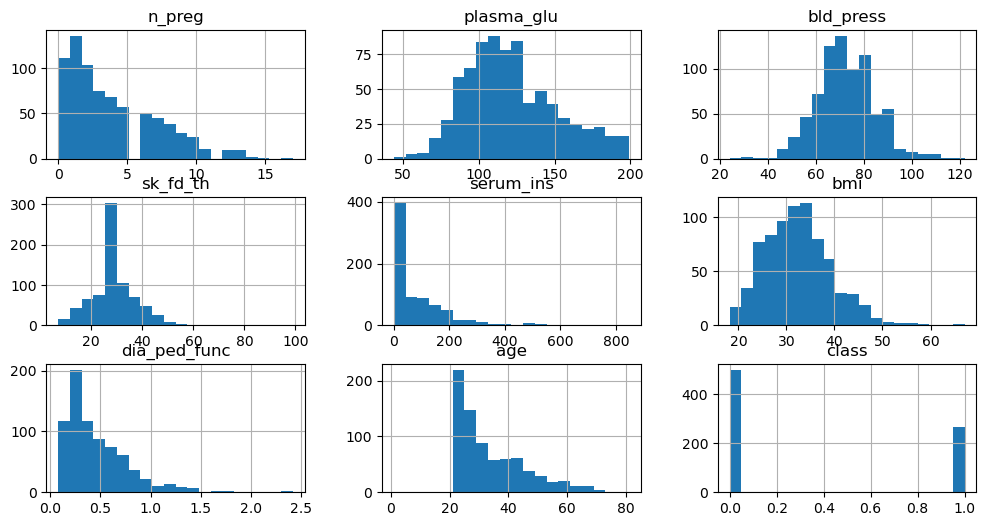

In [1969]:
dataFrame.hist(figsize=(12, 6), bins = 20, sharex = False, sharey = False)

n_preg             Axes(0.125,0.53;0.133621x0.35)
plasma_glu      Axes(0.285345,0.53;0.133621x0.35)
bld_press        Axes(0.44569,0.53;0.133621x0.35)
sk_fd_th        Axes(0.606034,0.53;0.133621x0.35)
serum_ins       Axes(0.766379,0.53;0.133621x0.35)
bmi                Axes(0.125,0.11;0.133621x0.35)
dia_ped_func    Axes(0.285345,0.11;0.133621x0.35)
age              Axes(0.44569,0.11;0.133621x0.35)
class           Axes(0.606034,0.11;0.133621x0.35)
dtype: object

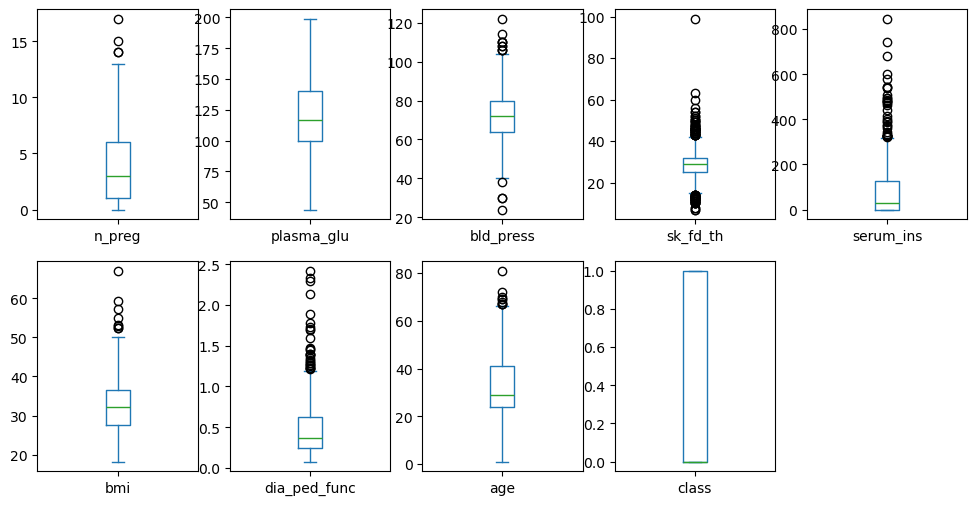

In [1970]:
dataFrame.plot(kind="box", subplots=True, layout=(2, 5), sharex=False, sharey=False, figsize=(12,6))

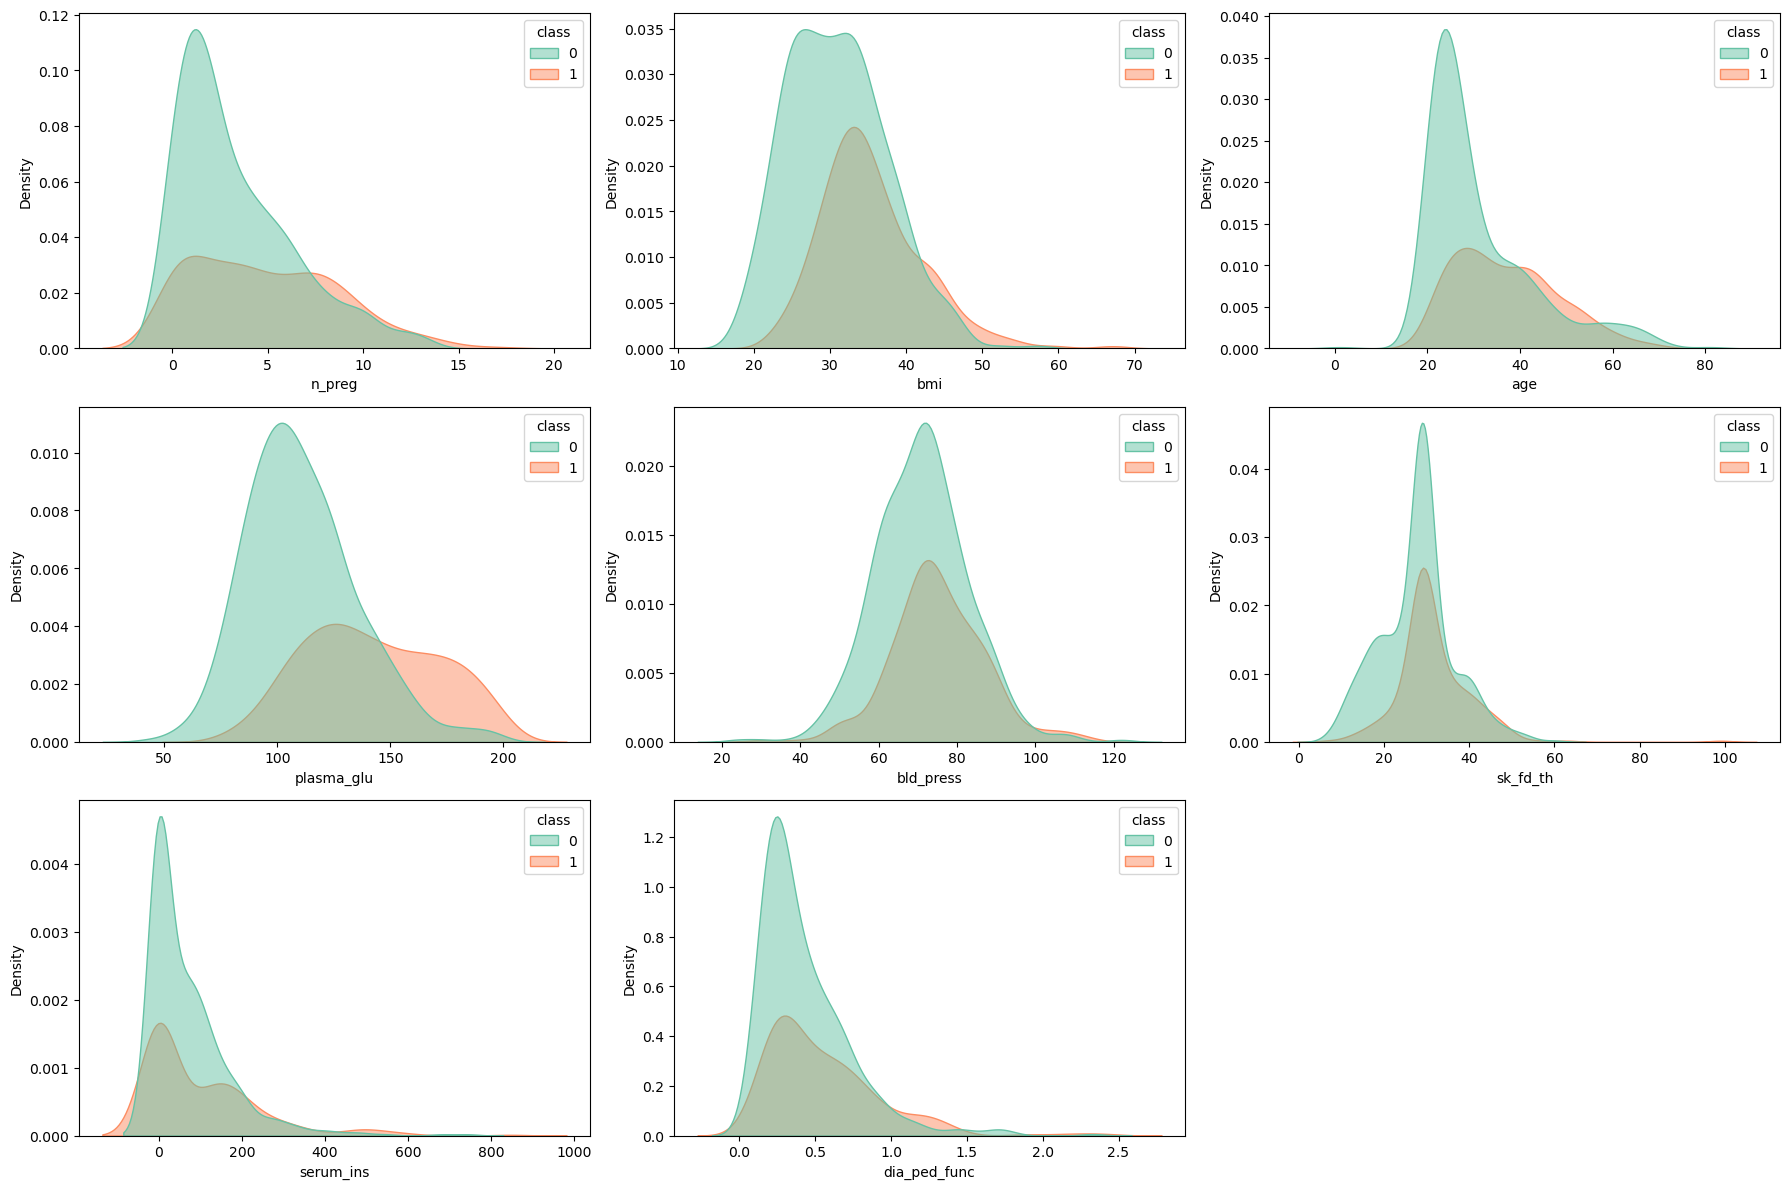

In [1971]:
cols = ["n_preg", "bmi", "age", "plasma_glu", "bld_press", "sk_fd_th", "serum_ins", "dia_ped_func"] 
fig, axes = plt.subplots(3, 3, figsize=(18, 12)) 

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.kdeplot(
        data=dataFrame,
        x=col,
        hue="class",
        fill=True,
        alpha=0.5,
        palette="Set2",
        ax=axes[i]
    )

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [1972]:
dataFrame.skew()

n_preg          0.901674
plasma_glu      0.535587
bld_press       0.141885
sk_fd_th        0.837608
serum_ins       2.272251
bmi             0.599233
dia_ped_func    1.919911
age             1.096696
class           0.635017
dtype: float64

<Axes: >

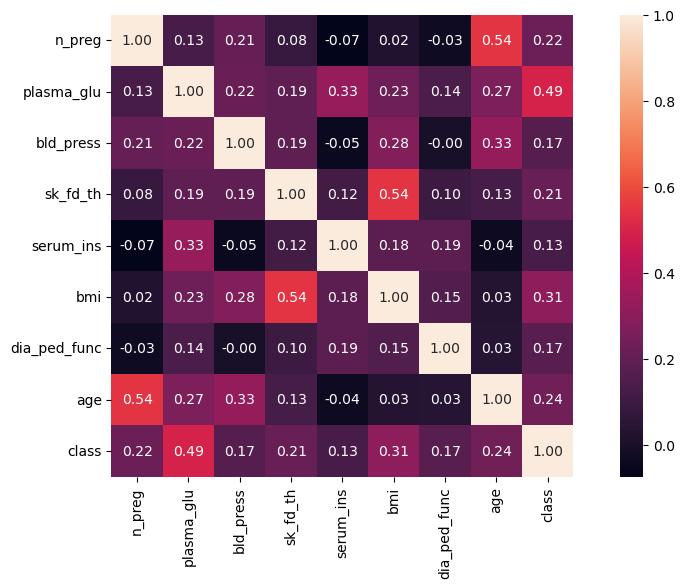

In [1973]:
corrMat = dataFrame.corr()
plt.subplots(figsize=(12, 6))
sns.heatmap(corrMat, annot = True, fmt='.2f', annot_kws={'size': 10}, vmax=1.0, square=True)

In [1974]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

copyDataFrame = dataFrame.copy()
X = copyDataFrame[["n_preg", "plasma_glu", "bmi", "age"]] 
y = copyDataFrame["class"]

# 70% train, 15% test, 15% validate
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train = np.log1p(X_train)
X_test = np.log1p(X_test)
X_val = np.log1p(X_val)

# Standardize features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [1975]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

models = {
    'Logistic Regression': LogisticRegression(
        class_weight="balanced", 
        random_state=42, 
        max_iter=1500),
    'Random Forest': RandomForestClassifier(
        class_weight="balanced", 
        random_state=42, 
        n_jobs=-1, 
        n_estimators=200),
    'XGBoost': XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight
    ),
    "SVC": SVC(
        kernel='rbf',         
        class_weight='balanced', 
        probability=True,
        random_state=42
    ),
    "K-Neighbours": KNeighborsClassifier(n_neighbors=5, weights='distance')
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1]

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC:  {roc_auc:.4f}")
    print("-" * 30)



Logistic Regression Results:
  Accuracy: 0.7217
  F1 Score: 0.6522
  ROC AUC:  0.8053
------------------------------
Random Forest Results:
  Accuracy: 0.7565
  F1 Score: 0.6585
  ROC AUC:  0.8113
------------------------------
XGBoost Results:
  Accuracy: 0.7478
  F1 Score: 0.6667
  ROC AUC:  0.8100
------------------------------
SVC Results:
  Accuracy: 0.7217
  F1 Score: 0.6735
  ROC AUC:  0.8210
------------------------------
K-Neighbours Results:
  Accuracy: 0.7130
  F1 Score: 0.5926
  ROC AUC:  0.7977
------------------------------


In [1976]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
results = {name: {'accuracy': [], 'f1': [], 'roc_auc': []} for name in models.keys()}


for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    scaler = StandardScaler()
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    for name, model in models.items():
        model.fit(X_train_fold_scaled, y_train_fold)

        y_pred = model.predict(X_val_fold_scaled)    
        y_prob = model.predict_proba(X_val_fold_scaled)[:,1]

        acc = accuracy_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)
        roc_auc = roc_auc_score(y_val_fold, y_prob)

        results[name]['accuracy'].append(acc)
        results[name]['f1'].append(f1)
        results[name]['roc_auc'].append(roc_auc)

    fold += 1

print("--------------------------")
for name in models.keys():
    acc_mean = sum(results[name]['accuracy']) / len(results[name]['accuracy'])
    f1_mean = sum(results[name]['f1']) / len(results[name]['f1'])
    roc_auc_mean = sum(results[name]['roc_auc']) / len(results[name]['roc_auc'])
    print(f"{name} Average Results:")
    print(f"  Accuracy: {acc_mean:.4f}")
    print(f"  F1 Score: {f1_mean:.4f}")
    print(f"  ROC AUC:  {roc_auc_mean:.4f}")
    print("-" * 30)
    

--------------------------
Logistic Regression Average Results:
  Accuracy: 0.7300
  F1 Score: 0.6475
  ROC AUC:  0.8362
------------------------------
Random Forest Average Results:
  Accuracy: 0.7654
  F1 Score: 0.6391
  ROC AUC:  0.8131
------------------------------
XGBoost Average Results:
  Accuracy: 0.7319
  F1 Score: 0.6151
  ROC AUC:  0.7758
------------------------------
SVC Average Results:
  Accuracy: 0.7411
  F1 Score: 0.6769
  ROC AUC:  0.8204
------------------------------
K-Neighbours Average Results:
  Accuracy: 0.7375
  F1 Score: 0.5997
  ROC AUC:  0.7924
------------------------------


In [1977]:
best_model = SVC(
        kernel='rbf',         
        class_weight='balanced', 
        probability=True,
        random_state=42
    )
best_model.fit(X_train, y_train)
y_val_pred = best_model.predict(X_val)

print("Actual values (first 10):")
print(y_val.head(10))

print("\nPredicted values (first 10):")
print(pd.Series(y_val_pred).head(10))

Actual values (first 10):
418    0
235    1
373    0
330    0
64     1
139    0
707    0
252    0
335    0
471    0
Name: class, dtype: int64

Predicted values (first 10):
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    0
8    1
9    1
dtype: int64


In [1978]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

print("Actual values (first 10):")
print(y_test.head(10).tolist())

print("\nPredicted values (first 10):")
print(y_test_pred[:10].tolist())

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print(f"ROC AUC: {roc_auc_score(y_test, y_test_prob):.4f}")

Actual values (first 10):
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Predicted values (first 10):
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        75
           1       0.67      0.76      0.71        41

    accuracy                           0.78       116
   macro avg       0.77      0.78      0.77       116
weighted avg       0.79      0.78      0.79       116

Confusion Matrix:
[[60 15]
 [10 31]]
ROC AUC: 0.8478
